In [19]:
# Connecting to Google Drive to have access to current files and a storage to save the new ones

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Importing the libraries and frameworks needed
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [21]:
print (cv2.__version__)
!python --version

4.7.0
Python 3.10.12


In [22]:
# a function to visualize an image
def show_image(image_bgr):
  # Convert the image from BGR to RGB
  image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
  # Display the image using matplotlib
  plt.imshow(image_rgb)
  plt.axis('off')  # Turn off axis labels
  plt.show()

In [ ]:
def extract_frames(video_path, output_path):
  video_capture = cv2.VideoCapture(video_path)
  frame_count = 0

  while video_capture.isOpened():
    # Read the current frame
    ret, frame = video_capture.read()

    # Break the loop if the video has ended
    if not ret:
        break

    # We could have edited each frame and save them in this section but it would 
    # have been an unnecessary huge load because of the number of the frames

    # Save the frame as an image
    frame_output_path = output_path + f'/frame_{frame_count}.jpg'
    cv2.imwrite(frame_output_path, frame)

    frame_count += 1
    
  video_capture.release()
  cv2.destroyAllWindows()


In [ ]:
extract_frames("/content/drive/MyDrive/Legal Analysis/video1.mov", "/content/drive/MyDrive/Legal Analysis/Frames")

In [31]:
def denoise_gamma_deblur(image, frame_number):
    
    # Denoise the image
    Idenoised = cv2.fastNlMeansDenoisingColored(image,None,4,5,3,21)
    denoised = (Idenoised - Idenoised.min()) / (Idenoised.max() - Idenoised.min())*255
    denoised = denoised.astype('uint8')

    # Apply gamma correction
    invGamma = 1.5
    table = np.array([((i / 255.0) ** invGamma) * 255
    for i in np.arange(0, 256)]).astype("uint8")
    image_eq = cv2.LUT(denoised, table)

    # Perform deblurring with a sharpening filter
    blurred = cv2.GaussianBlur(image_eq, (0, 0), 3)
    deblurred = cv2.addWeighted(image_eq, 1.5, blurred, -0.5, 0)

    show_image(denoised)
    print("denoised")
    show_image(image_eq)
    print("gamma_corrected")
    show_image(deblurred)
    print("deblurred")

    # Save the output image
    output_path = '/content/drive/MyDrive/Legal Analysis/Processed Frames'
    cv2.imwrite(output_path + f'/frame_{frame_number}_denoised.jpg', denoised)
    cv2.imwrite(output_path + f'/frame_{frame_number}_gamma_corrected.jpg', image_eq)
    cv2.imwrite(output_path + f'/frame_{frame_number}_deblurred.jpg', deblurred)

In [24]:
I1 = cv2.imread('/content/drive/MyDrive/Legal Analysis/Frames/frame_180.jpg')
I2 = cv2.imread('/content/drive/MyDrive/Legal Analysis/Frames/frame_185.jpg')
I3 = cv2.imread('/content/drive/MyDrive/Legal Analysis/Frames/frame_190.jpg')

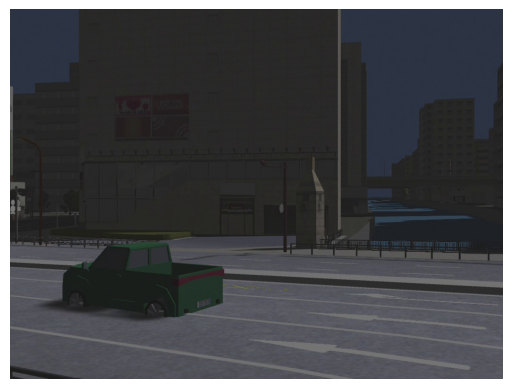

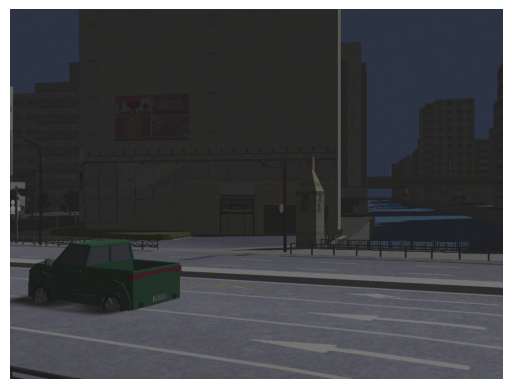

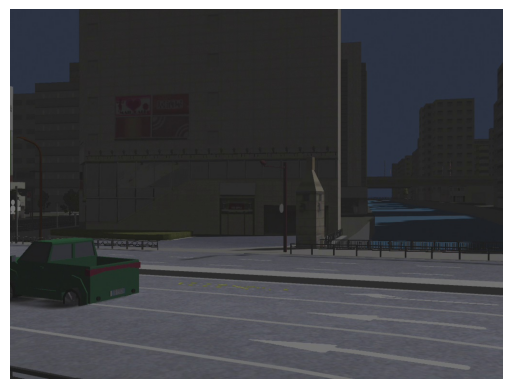

In [25]:
show_image(I1)
show_image(I2)
show_image(I3)

In [26]:
# frame_180
image_detail = I1[585:635,360:460,:]
width = image_detail.shape[1]*4;
height = image_detail.shape[0]*4;
dim=(width,height)
I1 = cv2.resize(image_detail, dim, interpolation=cv2. INTER_LANCZOS4)

# frame_185
image_detail = I2[570:620,260:360,:]
width = image_detail.shape[1]*4;
height = image_detail.shape[0]*4;
dim=(width,height)
I2 = cv2.resize(image_detail, dim, interpolation=cv2. INTER_LANCZOS4)

# frame_190
image_detail = I3[560:610,170:270,:]
width = image_detail.shape[1]*4;
height = image_detail.shape[0]*4;
dim=(width,height)
I3 = cv2.resize(image_detail, dim, interpolation=cv2. INTER_LANCZOS4)

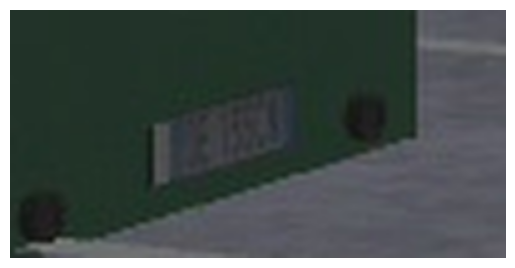

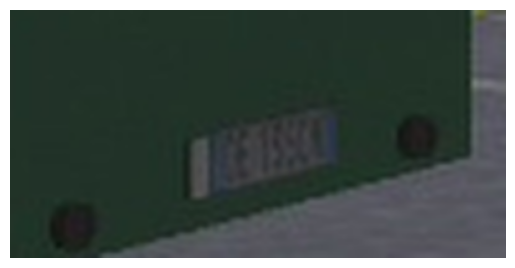

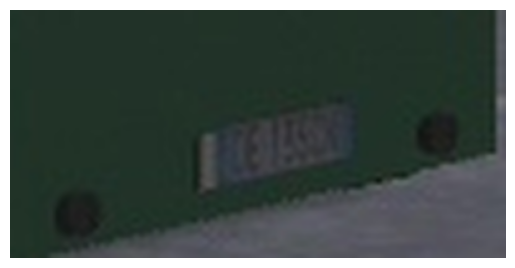

In [32]:
show_image(I1)
show_image(I2)
show_image(I3)

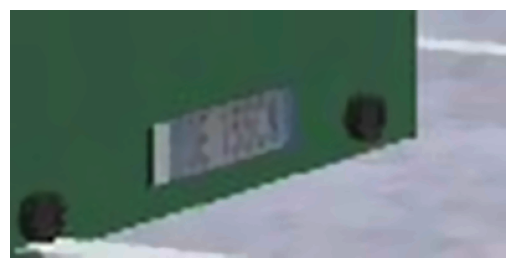

denoised


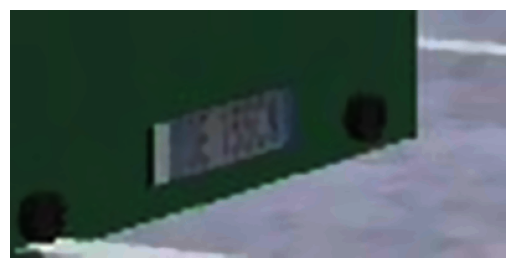

gamma_corrected


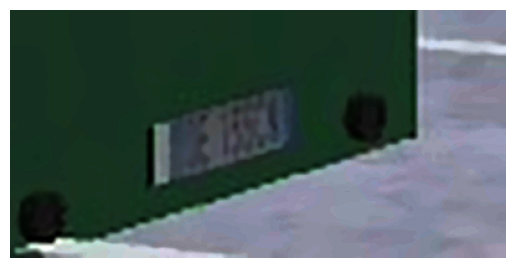

deblurred


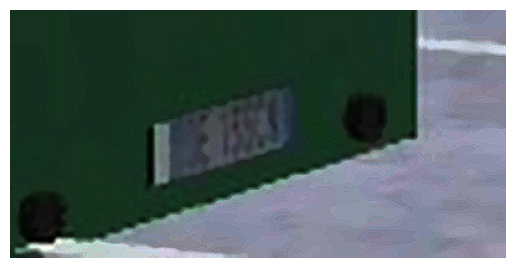

deblurred_alt


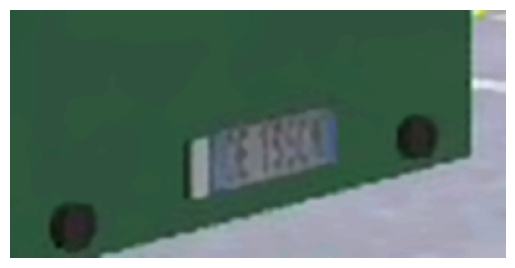

denoised


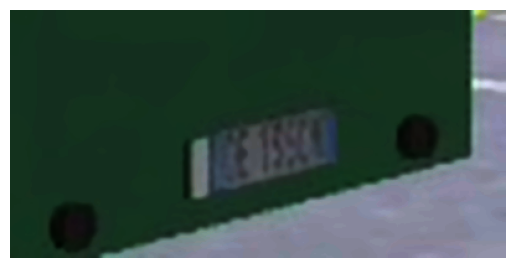

gamma_corrected


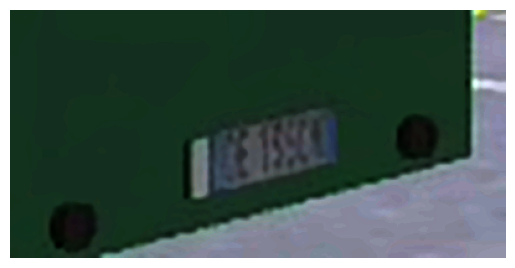

deblurred


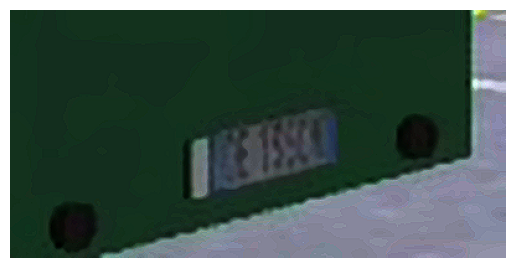

deblurred_alt


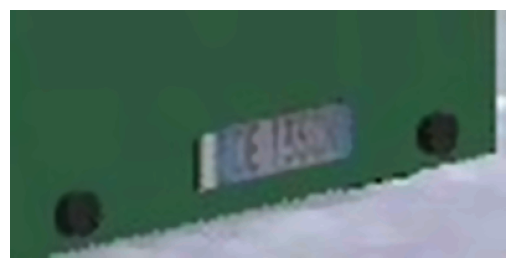

denoised


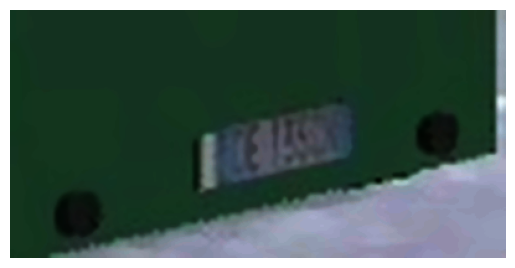

gamma_corrected


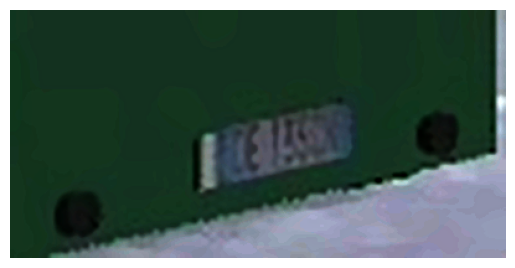

deblurred


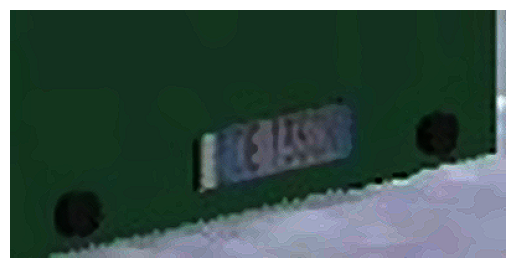

deblurred_alt


In [33]:
denoise_gamma_deblur(I1, 180)
denoise_gamma_deblur(I2, 185)
denoise_gamma_deblur(I3, 190)